
## Chap 07 Neural Network and Q-Learning

---- 

- conda env : [ai_robotics](../README.md#setup-a-conda-environment)

---


In [ ]:
# @title Chap 7.1.1
import numpy as np
import torch

x_np = np.array([5.0])
x = torch.from_numpy(x_np)
x.requires_grad=True
print(x)

y = 3*x**2
print(y)

y.backward()
print(x.grad)


tensor([5.], dtype=torch.float64, requires_grad=True)
tensor([75.], dtype=torch.float64, grad_fn=<MulBackward0>)
tensor([30.], dtype=torch.float64)


In [11]:
# @title Chap 7.1.2. Multi-dimension variable: Matrix
import numpy as np
import torch

# Vector Innner product
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
a, b = torch.from_numpy(a), torch.from_numpy(b)
c = torch.matmul(a, b)
print(c)

# Matrix Multiplication
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
a, b = torch.from_numpy(a), torch.from_numpy(b)
c = torch.matmul(a, b)
print(c)

tensor(32)
tensor([[19, 22],
        [43, 50]])


In [18]:
import torch

def rosenbrock(x0, x1):
    """
    Computes the Rosenbrock function.
    y = 100 * (x1 - x0 ** 2) ** 2 + (x0 - 1) ** 2
    """
    y = 100 * (x1 - x0.pow(2)).pow(2) + (x0 - 1).pow(2)
    return y

# Initialize the variables (tensors in PyTorch) and enable gradient tracking
x0 = torch.tensor(0.0, requires_grad=True)
x1 = torch.tensor(2.0, requires_grad=True)

iters = 10000  # the number of iterations
lr = 0.001     # learning rate

for i in range(iters):
    # Forward pass: computing the estimated value
    y = rosenbrock(x0, x1)

    # Reset gradients
    x0.grad = None
    x1.grad = None
    # Alternatively, use a more scalable method:
    # if x0.grad is not None: x0.grad.zero_()
    # if x1.grad is not None: x1.grad.zero_()

    # Backward pass: compute gradients
    y.backward()

    # Manually update variables without tracking gradients for the update step
    with torch.no_grad():
        x0 -= lr * x0.grad
        x1 -= lr * x1.grad

print(f"Final x0: {x0.item():.4f}, Final x1: {x1.item():.4f}")

Final x0: 0.9945, Final x1: 0.9890


49.62837219238281
0.2980329096317291
0.11950288712978363
0.108841173350811
0.10112348198890686
0.0952335000038147
0.09073736518621445
0.08730510622262955
0.08468509465456009
0.08268509060144424
====
W = 2.1782991886138916
b = 5.435568332672119


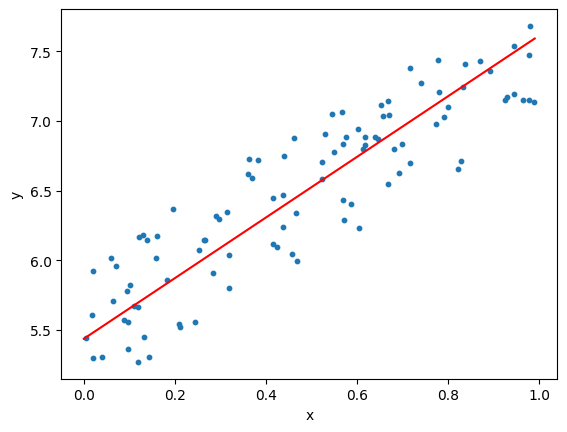

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Data set
np.random.seed(0)
x_np = np.random.rand(100, 1).astype(np.float32)
y_np = (5 + 2 * x_np + np.random.rand(100, 1)).astype(np.float32)

# Convert to PyTorch tensors with gradient tracking
x = torch.from_numpy(x_np)
y = torch.from_numpy(y_np)

# Variables
# Use torch.randn for random initialization, and require_grad=True to track gradients
W = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Prediction function
def predict(x_data, W_var, b_var):
    y_pred = torch.matmul(x_data, W_var) + b_var
    return y_pred

# Mean Squared Error
def mean_squared_error(x0, x1):
    diff = x0 - x1
    return torch.mean(diff ** 2)

# Gradient Descent Approach
lr = 0.1
iters = 100

for i in range(iters):
    y_pred = predict(x, W, b)
    loss = mean_squared_error(y, y_pred)

    # Reset gradients to zero
    if W.grad is not None:
        W.grad.zero_()
    if b.grad is not None:
        b.grad.zero_()

    # Backward pass to compute gradients
    loss.backward()

    # Update variables manually, without tracking gradients for the update step
    with torch.no_grad():
        W -= lr * W.grad
        b -= lr * b.grad

    if i % 10 == 0:  # Debug message
        print(loss.item())

print('====')
print(f'W = {W.item()}')
print(f'b = {b.item()}')

# After Training
plt.scatter(x_np, y_np, s=10)
plt.xlabel('x')
plt.ylabel('y')
t_np = np.arange(0, 1, 0.01, dtype=np.float32)[:, np.newaxis]
t = torch.from_numpy(t_np)
y_pred_final = predict(t, W, b)
plt.plot(t_np, y_pred_final.detach().numpy(), color='r')
plt.show()

### Chap 7.3 Neural Network

0.8231868147850037
0.24851612746715546
0.2404659241437912
0.21296264231204987
0.14789263904094696
0.08515449613332748
0.07716166228055954
0.07680463045835495
0.1291991025209427
0.07643893361091614
====
W1 = tensor([[ 1.2572],
        [-9.3868],
        [-0.8923],
        [-2.2624],
        [ 1.7831],
        [-1.7854],
        [ 0.1826],
        [ 1.6572],
        [-0.9385],
        [-1.2716]])
b1 = tensor([-3.6423e-01,  4.6723e+00,  2.5732e-02,  7.2214e-01, -9.6474e-01,
         3.2017e-02, -4.4062e-03, -7.8121e-01,  4.8041e-01, -4.4455e-01])
W2 = tensor([[ 0.9991,  5.2634, -0.9823, -3.0170,  1.7543, -2.1479,  0.0166,  1.4405,
         -1.1880, -1.5064]])
b2 = tensor([-0.9691])


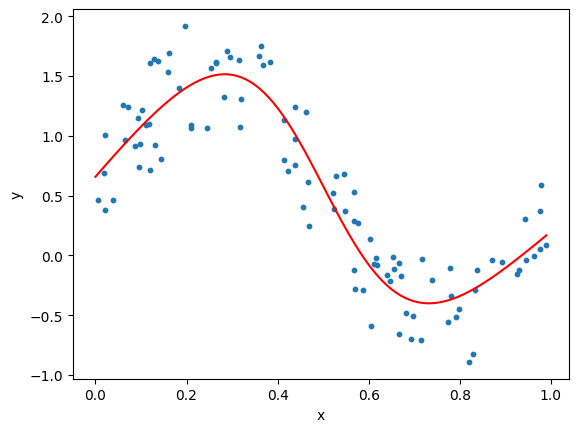

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Data set
np.random.seed(0)
x_np = np.random.rand(100, 1).astype(np.float32)
y_np = (np.sin(2 * np.pi * x_np) + np.random.rand(100, 1)).astype(np.float32)

# Convert to PyTorch tensors
x = torch.from_numpy(x_np)
y = torch.from_numpy(y_np)

# Define the neural network model
class TwoLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TwoLayerNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h = torch.sigmoid(self.l1(x))
        y_pred = self.l2(h)
        return y_pred

# Model instantiation
I, H, O = 1, 10, 1
model = TwoLayerNet(I, H, O)

# Loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=0.2)

iters = 10000

for i in range(iters):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 1000 == 0:  # Debug message
        print(loss.item())

print('====')
print('W1 =', model.l1.weight.data)
print('b1 =', model.l1.bias.data)
print('W2 =', model.l2.weight.data)
print('b2 =', model.l2.bias.data)

# After Training
plt.scatter(x_np, y_np, s=10)
plt.xlabel('x')
plt.ylabel('y')
t_np = np.arange(0, 1, 0.01, dtype=np.float32)[:, np.newaxis]
t = torch.from_numpy(t_np)

# Get predictions without tracking gradients
with torch.no_grad():
    y_pred_final = model(t)

plt.plot(t_np, y_pred_final.numpy(), color='r')
plt.show()


0.8473695516586304
0.25142863392829895
0.24759484827518463
0.23786136507987976
0.212222620844841
0.1674223095178604
0.09681972861289978
0.07849528640508652
0.07749730348587036
0.07722130417823792
====
W1 = tensor([[-1.9231, -1.7465, -9.6906, -0.9461, -0.3375, -1.8528, -1.6580, -1.7765,
         -1.5424, -1.6794]])
b1 = tensor([0.3144, 0.2074, 4.7512, 0.3312, 1.1180, 0.2572, 0.1937, 0.2121, 0.1892,
        0.1962])
W2 = tensor([[-2.0106],
        [-1.6556],
        [ 4.9946],
        [-0.4171],
        [ 0.4307],
        [-1.8729],
        [-1.4881],
        [-1.7174],
        [-1.2820],
        [-1.5276]])
b2 = tensor([2.0350])


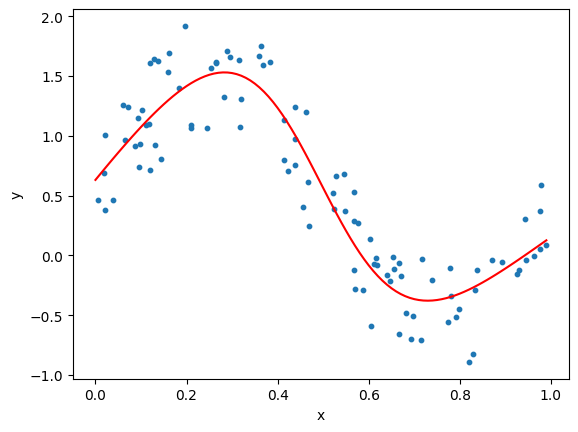

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Data set
np.random.seed(0)
x_np = np.random.rand(100, 1).astype(np.float32)
y_np = (np.sin(2 * np.pi * x_np) + np.random.rand(100, 1)).astype(np.float32)

x = torch.from_numpy(x_np)
y = torch.from_numpy(y_np)

# Variables
I, H, O = 1, 10, 1
W1 = torch.tensor(0.01 * np.random.randn(I, H), dtype=torch.float32, requires_grad=True)
b1 = torch.tensor(np.zeros(H), dtype=torch.float32, requires_grad=True)
W2 = torch.tensor(0.01 * np.random.randn(H, O), dtype=torch.float32, requires_grad=True)
b2 = torch.tensor(np.zeros(O), dtype=torch.float32, requires_grad=True)

# Prediction function
def predict(x_data):
    y_inter = torch.sigmoid(torch.matmul(x_data, W1) + b1)
    y_pred = torch.matmul(y_inter, W2) + b2
    return y_pred

# Mean Squared Error (using built-in function)
def mean_squared_error(x0, x1):
    return torch.mean((x0 - x1) ** 2)

# Gradient Descent Approach
lr = 0.2
iters = 10000

for i in range(iters):
    y_pred = predict(x)
    loss = mean_squared_error(y, y_pred)

    # Reset gradients to zero
    W1.grad = None
    b1.grad = None
    W2.grad = None
    b2.grad = None

    loss.backward()

    # Update variables manually
    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad

    if i % 1000 == 0:
        print(loss.item())

print('====')
print('W1 =', W1.data)
print('b1 =', b1.data)
print('W2 =', W2.data)
print('b2 =', b2.data)

# After Training
plt.scatter(x_np, y_np, s=10)
plt.xlabel('x')
plt.ylabel('y')
t_np = np.arange(0, 1, 0.01, dtype=np.float32)[:, np.newaxis]
t = torch.from_numpy(t_np)
y_pred_final = predict(t)
plt.plot(t_np, y_pred_final.detach().numpy(), color='r')
plt.show()


### Chap 7.3.4 Layers and Model

0.8492957353591919
0.24777507781982422
0.2343955934047699
0.20193937420845032
0.1374197155237198
0.08224982023239136
0.0770588368177414
0.07672670483589172
0.07652667909860611
0.07634513080120087


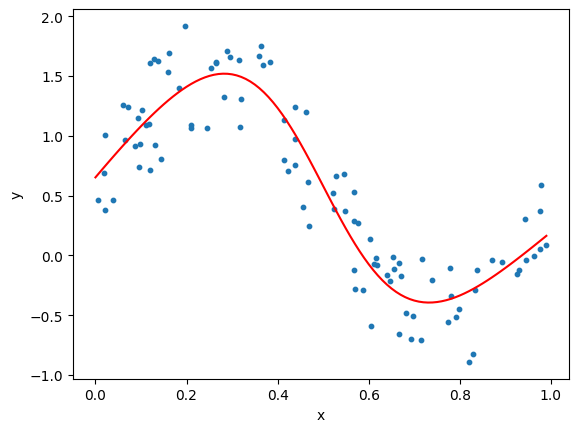

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Data set
np.random.seed(0)
x_np = np.random.rand(100, 1).astype(np.float32)
y_np = (np.sin(2 * np.pi * x_np) + np.random.rand(100, 1)).astype(np.float32)

# Convert to PyTorch tensors
x = torch.from_numpy(x_np)
y = torch.from_numpy(y_np)

# Define the neural network model
class TwoLayerNet(nn.Module):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        # nn.Linear automatically manages the weight (W) and bias (b) parameters
        self.l1 = nn.Linear(in_features=1, out_features=hidden_size)
        self.l2 = nn.Linear(in_features=hidden_size, out_features=out_size)

    def forward(self, x_input):
        y_inter = torch.sigmoid(self.l1(x_input))
        y_pred = self.l2(y_inter)
        return y_pred

# Model instantiation
lr = 0.2
iters = 10000
model = TwoLayerNet(10, 1)

# Loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.SGD(model.parameters(), lr=lr)

for i in range(iters):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 1000 == 0:  # Debug message
        print(loss.item())

# After Training
plt.scatter(x_np, y_np, s=10)
plt.xlabel('x')
plt.ylabel('y')
t_np = np.arange(0, 1, .01)[:, np.newaxis].astype(np.float32)
t = torch.from_numpy(t_np)

# Get predictions without tracking gradients
with torch.no_grad():
    y_pred_final = model(t)

plt.plot(t_np, y_pred_final.numpy(), color='r')
plt.show()


0.8353184461593628
0.24854925274848938
0.242137610912323
0.22445888817310333
0.1807618886232376
0.10628944635391235
0.07890014350414276
0.07837264984846115
0.07702063769102097
0.07686436921358109


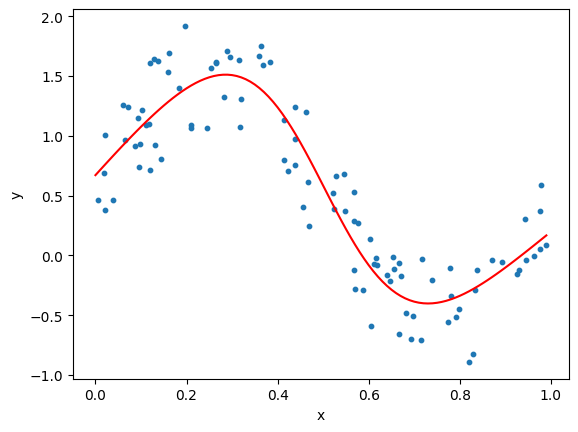

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Data set
np.random.seed(0)
x_np = np.random.rand(100, 1).astype(np.float32)
y_np = (np.sin(2 * np.pi * x_np) + np.random.rand(100, 1)).astype(np.float32)

# Convert to PyTorch tensors
x = torch.from_numpy(x_np)
y = torch.from_numpy(y_np)

# Define the neural network model using nn.Sequential
model = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Sigmoid(),
    nn.Linear(in_features=10, out_features=1)
)

# Loss function and optimizer
lr = 0.2
iters = 10000
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

for i in range(iters):
    # Forward pass
    y_pred = model(x)
    loss = criterion(y_pred, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 1000 == 0:
        print(loss.item())

# After Training
plt.scatter(x_np, y_np, s=10)
plt.xlabel('x')
plt.ylabel('y')
t_np = np.arange(0, 1, .01)[:, np.newaxis].astype(np.float32)
t = torch.from_numpy(t_np)

with torch.no_grad():
    y_pred_final = model(t)

plt.plot(t_np, y_pred_final.numpy(), color='r')
plt.show()


### Chap 7.3.5 Optimization

0.5623631477355957
0.24976764619350433
0.24737703800201416
0.24267272651195526
0.2329896092414856
0.21065418422222137
0.1415223926305771
0.09313825517892838
0.07744505256414413
0.07705418765544891


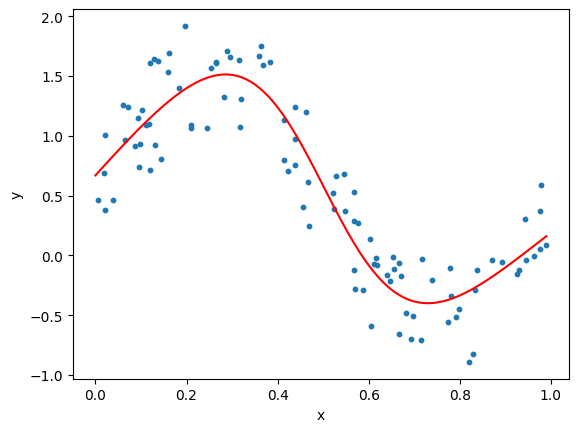

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# --- Data set ---
np.random.seed(0)
x_np = np.random.rand(100, 1).astype(np.float32)
y_np = (np.sin(2 * np.pi * x_np) + np.random.rand(100, 1)).astype(np.float32)

# Convert to PyTorch tensors
x = torch.from_numpy(x_np)
y = torch.from_numpy(y_np)

# --- Neural network model ---
class TwoLayerNet(nn.Module):
    def __init__(self, hidden_size, out_size):
        super().__init__()
        # nn.Linear automatically manages the weight (W) and bias (b) parameters
        self.l1 = nn.Linear(in_features=1, out_features=hidden_size)
        self.l2 = nn.Linear(in_features=hidden_size, out_features=out_size)

    def forward(self, x_input):
        y_inter = torch.sigmoid(self.l1(x_input))
        y_pred = self.l2(y_inter)
        return y_pred

# --- Optimization parameters ---
lr = 0.2
iters = 10000

# --- Model, loss, and optimizer setup ---
model = TwoLayerNet(10, 1)
optimizer = optim.SGD(model.parameters(), lr=lr)  #
criterion = nn.MSELoss()

# --- Training loop ---
for i in range(iters):
    # Forward pass: compute predicted y
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)

    # Reset gradients, backpropagate, and update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 1000 == 0:
        print(loss.item())

# --- After Training ---
plt.scatter(x_np, y_np, s=10)
plt.xlabel('x')
plt.ylabel('y')

# Generate test data for plotting
t_np = np.arange(0, 1, .01)[:, np.newaxis].astype(np.float32)
t = torch.from_numpy(t_np)

# Get predictions without tracking gradients
with torch.no_grad():
    y_pred_final = model(t)

plt.plot(t_np, y_pred_final.numpy(), color='r')
plt.show()


In [ ]:
# @title Chap 7.3.5 Optimization
import numpy as np

def one_hot(state):

    HEIGHT, WIDTH = 3, 4
    vec = np.zeros(HEIGHT * WIDTH, dtype = np.float32)
    y, x = state
    idx = WIDTH * y + x
    vec[idx] = 1.0
    return vec[np.newaxis, :]

state = (2, 0)
x = one_hot(state)

print(x.shape)
print(x)


(1, 12)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


----
### Chap 7.4 Neural Network and Q-Learning


Q-Learning
- <font color="red">$$Q'_{\pi}(S_t, A_t) = Q_{\pi}(S_t, A_t) + \alpha \big(  R_t + \gamma \underset{a}{\operatorname{max}}Q(S_{t+1}, a) - V_{\pi}(S_t, A_t)\big)$$ </font>

- $Q'_{\pi}(S_t, A_t) = Q_{\pi}(S_t, A_t) + \alpha \big( T - V_{\pi}(S_t, A_t)\big)$
    - $ R_t + \gamma \underset{a}{\operatorname{max}}Q(S_{t+1}, a) = T$

/Users/hyunjae.k/anaconda3/envs/rl_learning/lib/python3.10/site-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


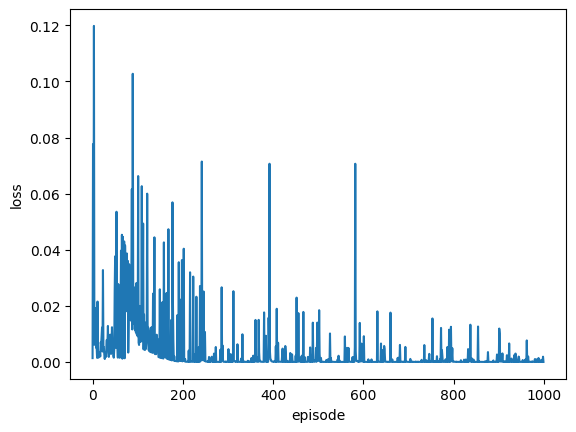

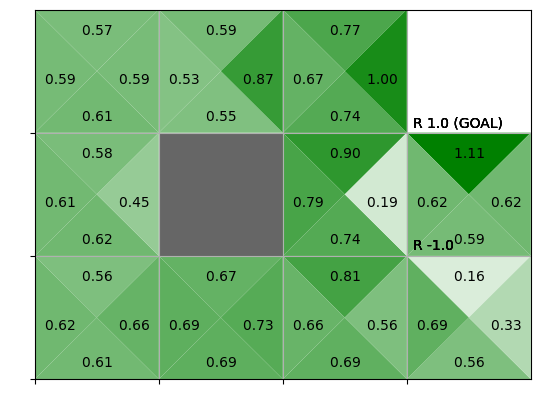

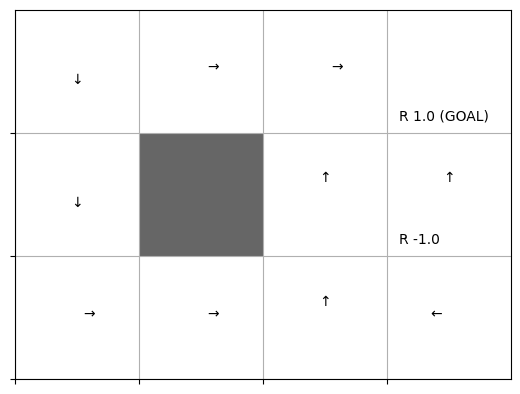

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from common.gridworld import GridWorld


def one_hot(state):
    """Encodes the grid world state into a one-hot vector."""
    HEIGHT, WIDTH = 3, 4
    vec = np.zeros(HEIGHT * WIDTH, dtype=np.float32)
    y, x = state
    idx = WIDTH * y + x
    vec[idx] = 1.0
    return torch.from_numpy(vec[np.newaxis, :])


class QNet(nn.Module):
    """Defines the Q-network for the agent."""
    def __init__(self):
        super().__init__()
        # PyTorch layers for the network
        self.l1 = nn.Linear(12, 100)  # State space (3*4=12), Hidden Layer (100)
        self.l2 = nn.Linear(100, 4)   # Output size (the size of action)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        return x


class QLearningAgent:
    """Implements the Q-Learning agent logic."""
    def __init__(self):
        self.gamma = 0.9
        self.lr = 0.01
        self.epsilon = 0.1
        self.action_size = 4

        self.qnet = QNet()
        self.optimizer = optim.SGD(self.qnet.parameters(), lr=self.lr)
        self.criterion = nn.MSELoss()

    def get_action(self, state_vec):  # e-greedy policy
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.action_size)
        else:
            with torch.no_grad():
                qs = self.qnet(state_vec)
            return qs.argmax().item()

    def update(self, state, action, reward, next_state, done):
        state_tensor = state
        action_tensor = torch.tensor([action], dtype=torch.long)  # Make action a 1D tensor
        reward_tensor = torch.tensor(reward, dtype=torch.float32)
        next_state_tensor = next_state
        done_tensor = torch.tensor(done, dtype=torch.float32)

        # Compute target Q value
        if done:
            next_q = torch.tensor(0.0)
        else:
            with torch.no_grad():
                next_qs = self.qnet(next_state_tensor)
                next_q = next_qs.max(1)[0] # .max() returns a tuple (values, indices), so select values

        target = reward_tensor + (1 - done_tensor) * self.gamma * next_q

        # Get Q value for the current state and action
        qs = self.qnet(state_tensor)
        q = qs.gather(1, action_tensor.unsqueeze(0)) # Add a dimension for the gather index

        # Calculate loss
        loss = self.criterion(q, target.unsqueeze(0))

        # Backpropagation and optimization
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        return loss.item()



# --- Training loop ---
env = GridWorld()
agent = QLearningAgent()

episodes = 1000
loss_history = []

for episode in range(episodes):
    state = env.reset()
    state = one_hot(state)
    total_loss, cnt = 0, 0
    done = False

    while not done:
        action = agent.get_action(state)
        next_state, reward, done = env.step(action)
        next_state = one_hot(next_state)

        loss = agent.update(state, action, reward, next_state, done)
        total_loss += loss
        cnt += 1
        state = next_state

    if cnt > 0:
        average_loss = total_loss / cnt
        loss_history.append(average_loss)

# --- Visualization ---
plt.xlabel('episode')
plt.ylabel('loss')
plt.plot(range(len(loss_history)), loss_history)
plt.show()

# --- Render final Q-values ---
Q = {}
for state in env.states():
    with torch.no_grad():
        state_tensor = one_hot(state)
        q_values = agent.qnet(state_tensor).squeeze()
        for action in env.action_space:
            Q[(state, action)] = q_values[action].item()
env.render_q(Q)

